In [32]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sp
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
import sunau;
import librosa
import librosa.display

[-0.00621128 -0.0058326  -0.00038716 ...,  0.02168479  0.00500404
 -0.01104186]
22050
('len', 1025)
[[ -1.01463854e+00 -0.00000000e+00j  -1.03090560e+00 -0.00000000e+00j
   -1.07969093e+00 -0.00000000e+00j ...,   4.06542015e+00 -0.00000000e+00j
    4.97798920e+00 -0.00000000e+00j   5.22475672e+00 -0.00000000e+00j]
 [  4.98706430e-01 +1.24683250e-18j   4.92009908e-01 +5.82228648e-03j
    5.90322495e-01 +3.82735319e-02j ...,  -1.98248720e+00 -1.04039550e+00j
   -2.90044713e+00 +2.10332081e-01j  -2.27233911e+00 -4.44317907e-01j]
 [  2.71757394e-01 -2.75111057e-17j  -3.72814089e-02 +2.87722886e-01j
   -3.12340230e-01 -1.82575494e-01j ...,  -6.33043826e-01 +7.08855569e-01j
    8.52521300e-01 -8.79867196e-01j  -5.63908637e-01 +8.49918365e-01j]
 ..., 
 [  2.47872993e-03 -1.11183135e-18j  -1.24962791e-03 -5.78062318e-05j
   -1.10866531e-05 -3.27054513e-05j ...,  -1.15678857e-04 +4.35301918e-05j
    1.87250535e-05 -3.91838490e-04j   1.01293321e-03 +1.84522814e-03j]
 [ -2.40351539e-03 -1.2088854

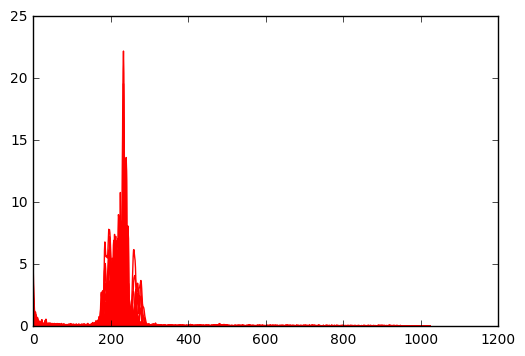

In [3]:
filename="bird.wav"; 
y, sr = librosa.load(filename);
print(y);
print(sr);
a=y;
b=[(ele/2**8.)*2-1 for ele in a] 
#librosa.feature.spectral_centroid();
c=librosa.stft(y=y);
print("len",len(c));
print(c);
d = len(b)/1  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
plt.show()

44100
[[-313 -439]
 [ -63 -188]
 [-188 -188]
 ..., 
 [-251 -125]
 [-627 -501]
 [-814 -814]]
('len', 78588)
[[ 7.875      0.984375 ]
 [ 3.9609375  0.9765625]
 [ 4.9375     0.       ]
 ..., 
 [ 1.0234375  0.9765625]
 [ 1.015625   0.       ]
 [ 0.53125    0.484375 ]]


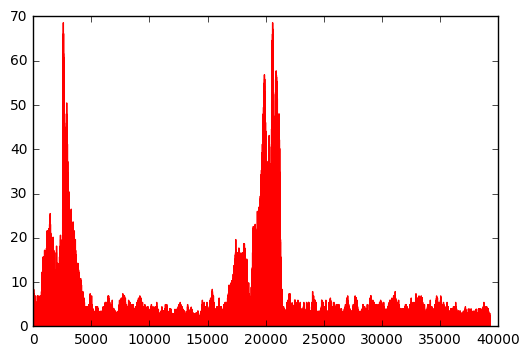

In [4]:
af="a.wav";
bf="bird.wav"
aud_file=bf;
fs, data = wavfile.read(aud_file) # load the data
print(fs);
print(data);
a=data;
print("len",len(data));
#a = data.T[0]; # this is a two channel soundtrack, I get the first track
#print(a);
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
#print(b);
c = fft(b) # calculate fourier transform (complex numbers list)
print(abs(c[:(d-1)]));
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
plt.show()

/home/khursheed/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


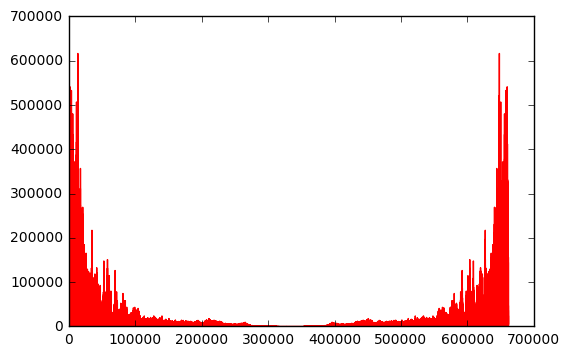

array([  240,   544,   250, ..., -1822, -2001, -2103], dtype=int16)

In [39]:
d = len(c)/1
plt.plot(abs(c[:(d-1)]),'r') 
plt.show()
data

In [143]:

class PreProcessing:
    filename=None;
    y=None;
    sr=None;
    log_enabled=True;
    centroid=None;
    spectro=None;
    spectro_phase=None;
    sample_vector_size=660000;    
    def __init__(self,filename):
        #self.log(filename);
        self.filename=filename;
        self.y, self.sr = librosa.load(filename);
        self.y=self.y[:self.sample_vector_size];
        pass;
    
    #Short-Term-Fourier trasform
    def getSTFT(self):
        self.stft=librosa.stft(y=self.y);
        return self.stft;
        pass;
    
    #spectro graph
    def getSpectrogram(self):
        stft=self.getSTFT();
        self.spectro, self.spectro_phase = librosa.magphase(stft);        
        return self.spectro, self.spectro_phase;
        pass;
    
    def getCentroid(self):
        self.centroid=librosa.feature.spectral_centroid(y=self.y,sr=self.sr);
        return self.centroid;    

    def getSpectralRolloff(self):
        self.rolloff=librosa.feature.spectral_rolloff(y=self.y, sr=self.sr);
        return self.rolloff;
    
    def drawSpectrogramWithCentroid(self):
        centroid=self.getCentroid();
        S,phase=self.getSpectrogram();
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.semilogy(centroid.T, label='Spectral centroid')
        plt.ylabel('Hz')
        plt.xticks([])
        plt.xlim([0, centroid.shape[-1]])
        plt.legend()
        plt.subplot(2, 1, 2)
        librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
        plt.title('log Power spectrogram')
        plt.tight_layout();
        plt.show();
        pass;
    
    def drawSpectralRolloff(self):
        rolloff=self.getSpectralRolloff();
        S,phase=self.getSpectrogram();
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.semilogy(rolloff.T, label='Roll-off frequency')
        plt.ylabel('Hz')
        plt.xticks([])
        plt.xlim([0, rolloff.shape[-1]])
        plt.legend()
        plt.subplot(2, 1, 2)
        librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
        plt.title('log Power spectrogram')
        plt.tight_layout();
        plt.show();
        pass;
    
    def log(self,a,b=None):
        if(self.log_enabled):
            if(b!=None):
                print(a,b);
            else:
                print(a);
        pass;  


In [85]:
dir="../genres";
genre_dir={"blues":"blues","classical":"classical","country":"country","disco":"disco","hiphop":"hiphop","jazz":"jazz","metal":"metal","pop":"pop","reggae":"reggae","rock":"rock"};

-------------------[reggae]-----------------------


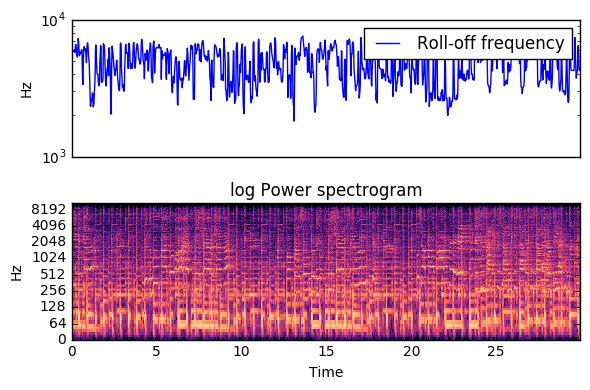

[[ 5630.93261719  5964.69726562  5996.99707031 ...,  4435.83984375
   4263.57421875  4274.34082031]]
(0, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


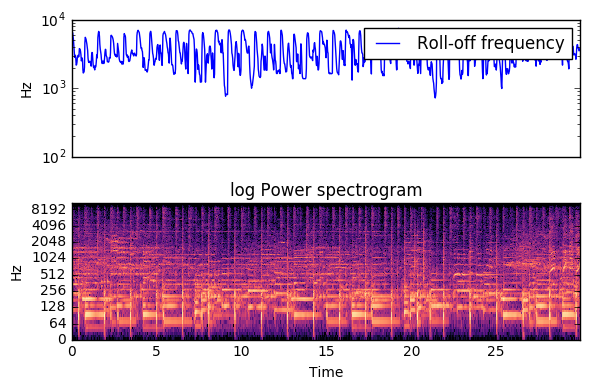

[[ 5630.93261719  6395.36132812  6481.49414062 ...,  3509.91210938
   3552.97851562  3757.54394531]]
(1, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


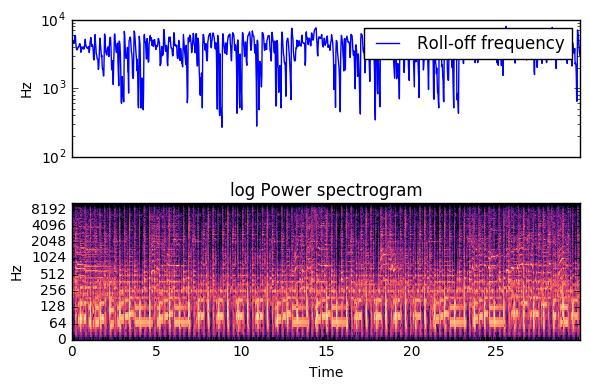

[[ 5673.99902344  5340.234375    4791.13769531 ...,  4155.90820312
   3359.1796875   3036.18164062]]
(2, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


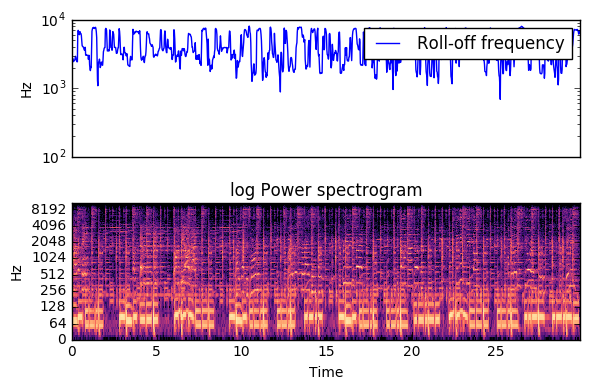

[[ 2680.88378906  2648.58398438  2691.65039062 ...,  6276.92871094
   6933.69140625  6524.56054688]]
(3, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


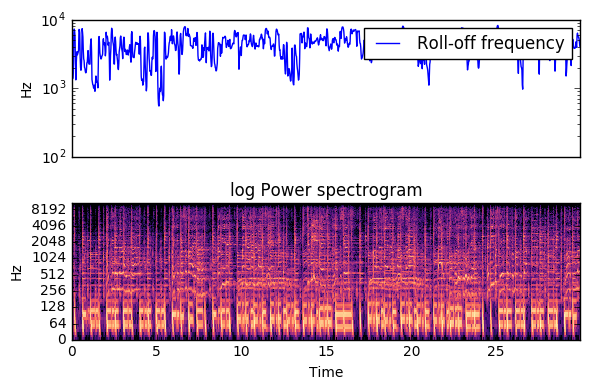

[[ 2594.75097656  2207.15332031  1378.125      ...,  5211.03515625
   4715.77148438  4112.84179688]]
(4, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


KeyboardInterrupt: 

In [145]:
#SpectralRolloff
for k in genre_dir:    
    genre=k;
    print("-------------------["+genre+"]-----------------------")
    ta=[];
    for i in range(10):
        audio_number="%0.5d"%i;
        filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au"; 
        pp=PreProcessing(filename);
        pp.drawSpectralRolloff();
        print(pp.getSpectralRolloff()); 
        ta.append(len(pp.y));
        print(i,":",len(pp.getSpectralRolloff()[0])," ylen:",len(pp.y)," sr:",pp.sr);    
    print(genre," ymin:",np.min(ta),' max:',np.max(ta));
    break;


-------------------[reggae]-----------------------


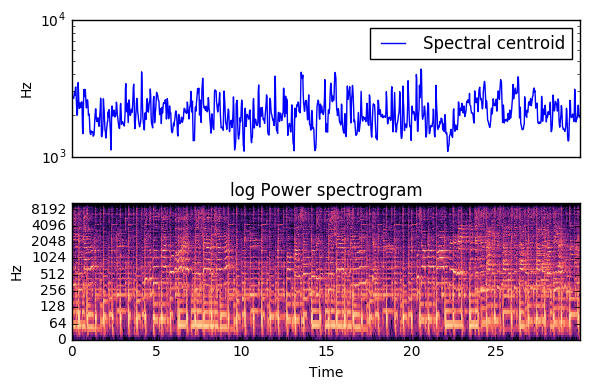

[[ 2335.10032977  2629.27085496  2734.6927377  ...,  1949.27495804
   1937.48775201  1964.36462112]]
(0, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


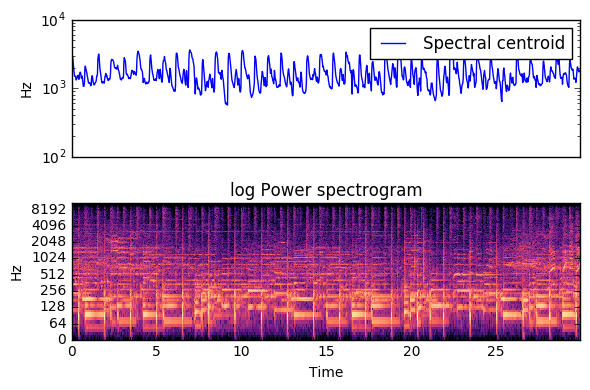

[[ 2312.82316885  2723.29467942  2834.16330255 ...,  1728.79504045
   1766.04811656  1825.29732201]]
(1, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


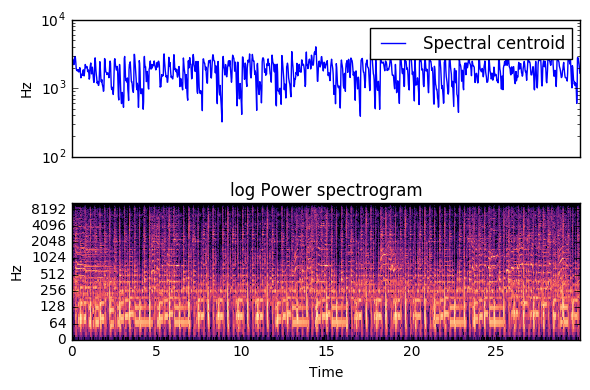

[[ 2701.72117832  2722.86982329  2648.09597231 ...,  2225.87461674
   1936.3644051   1660.01995776]]
(2, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


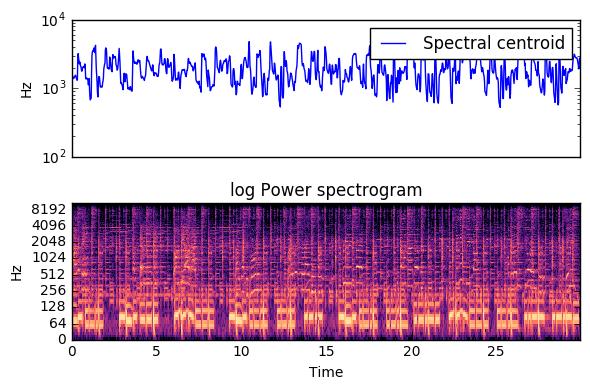

[[ 1365.04915148  1426.34357172  1480.27289264 ...,  2020.06221452
   2703.23984088  2755.63925823]]
(3, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


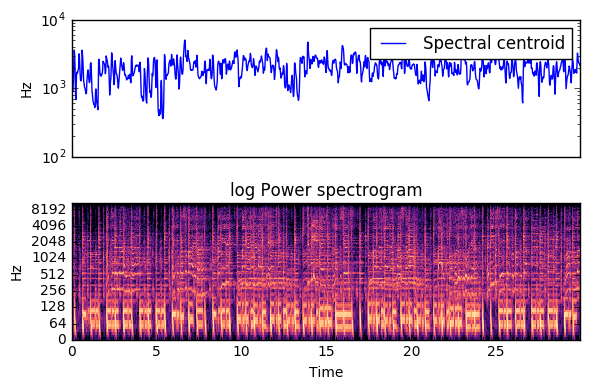

[[ 1269.19050491  1062.5556178    888.37053803 ...,  2304.98985725
   2296.31412865  2160.93124773]]
(4, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


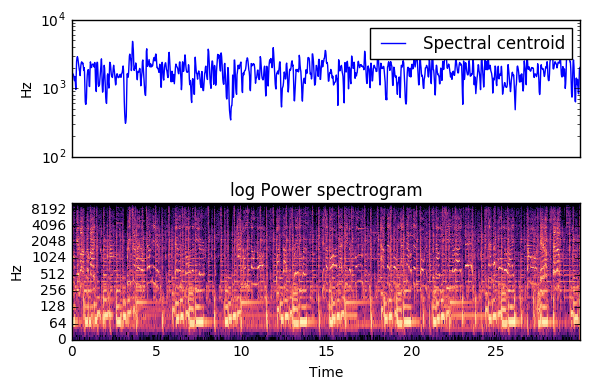

[[ 1781.2393111   1705.04639917  1626.67829708 ...,  1205.38389977
   1893.07239072  2005.94182083]]
(5, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


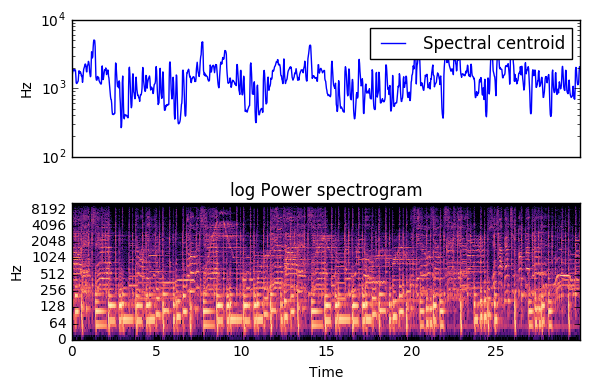

[[ 1389.47136186  1574.40305627  1730.59949907 ...,  1673.27213871
   2060.16631694  2003.17974631]]
(6, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


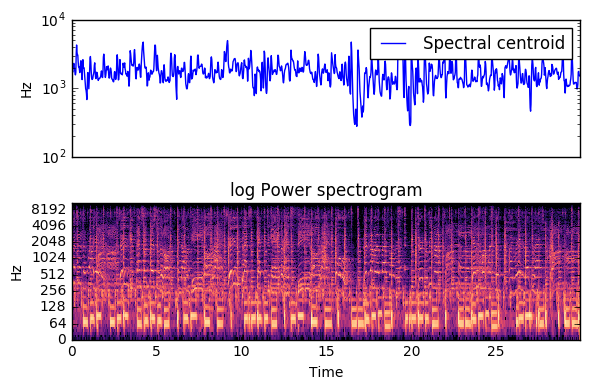

[[ 1885.05475096  1877.46009439  1713.20806299 ...,  1581.68326777
   1539.81808996  1508.0465519 ]]
(7, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


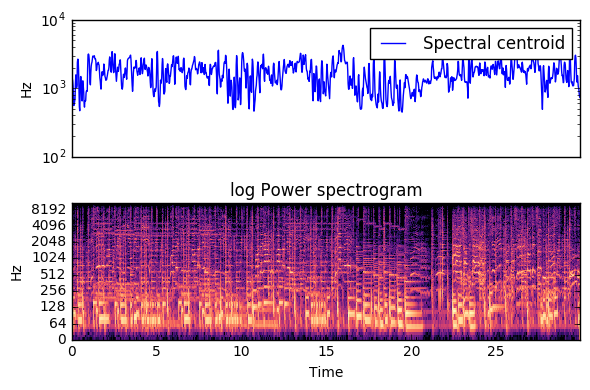

[[ 1132.10393724  1380.11751866  1286.70223232 ...,   873.116642
    770.7533269    736.74365293]]
(8, ':', 1290, ' ylen:', 660000, ' sr:', 22050)


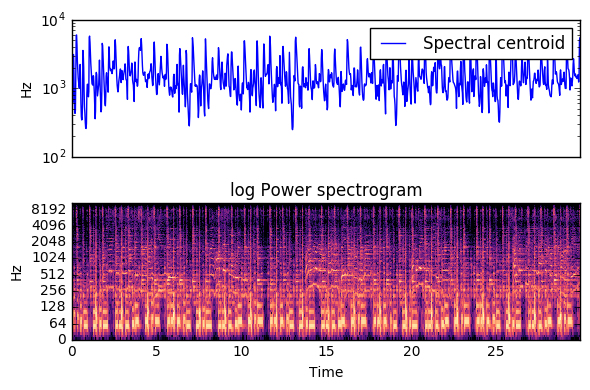

[[  950.54471546   762.25030419   617.0688468  ...,  1507.91441028
   4975.57698512  5421.90278019]]
(9, ':', 1290, ' ylen:', 660000, ' sr:', 22050)
('reggae', ' ymin:', 660000, ' max:', 660000)


../genres/blues/blues.00000.au
[ 0.00732422  0.01660156  0.00762939 ..., -0.05560303 -0.06106567
 -0.06417847]
22050
[[ 2175.02383202  2103.86995659  1955.28566719 ...,  1490.45684232
   1506.97561259  1442.64520671]]


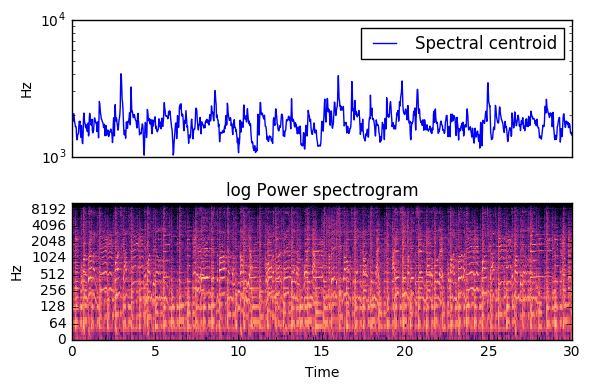

In [108]:
genre="blues";
audio_number="00000";
filename=dir+"/"+genre_dir[genre]+"/"+genre_dir[genre]+"."+audio_number+".au"; 
print(filename);
y, sr = librosa.load(filename);
stft=librosa.stft(y=y);
print(y);print(sr);
cent=librosa.feature.spectral_centroid(y=y,sr=sr);
print(cent);
S, phase = librosa.magphase(stft);
drawSpectrogramWithCentroid(cent,S);